# **Task 3 :**
The goal is to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [127]:
df.shape

(150, 5)

In [128]:
df.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We have three Species
* Iris-setosa        
* Iris-versicolor    
* Iris-virginica

In [129]:
#checking for missing values
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [130]:
#no null values so we will check for duplication
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [131]:
df.duplicated().any()

True

In [132]:
count = df.duplicated().sum()
print("the duplicated valuesare :", count)

the duplicated valuesare : 3


In [133]:
#remove the duplicates
df.drop_duplicates(inplace = True)

In [134]:
df.duplicated().sum()


0

In [135]:
#data summary in short
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Data Visualization**

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

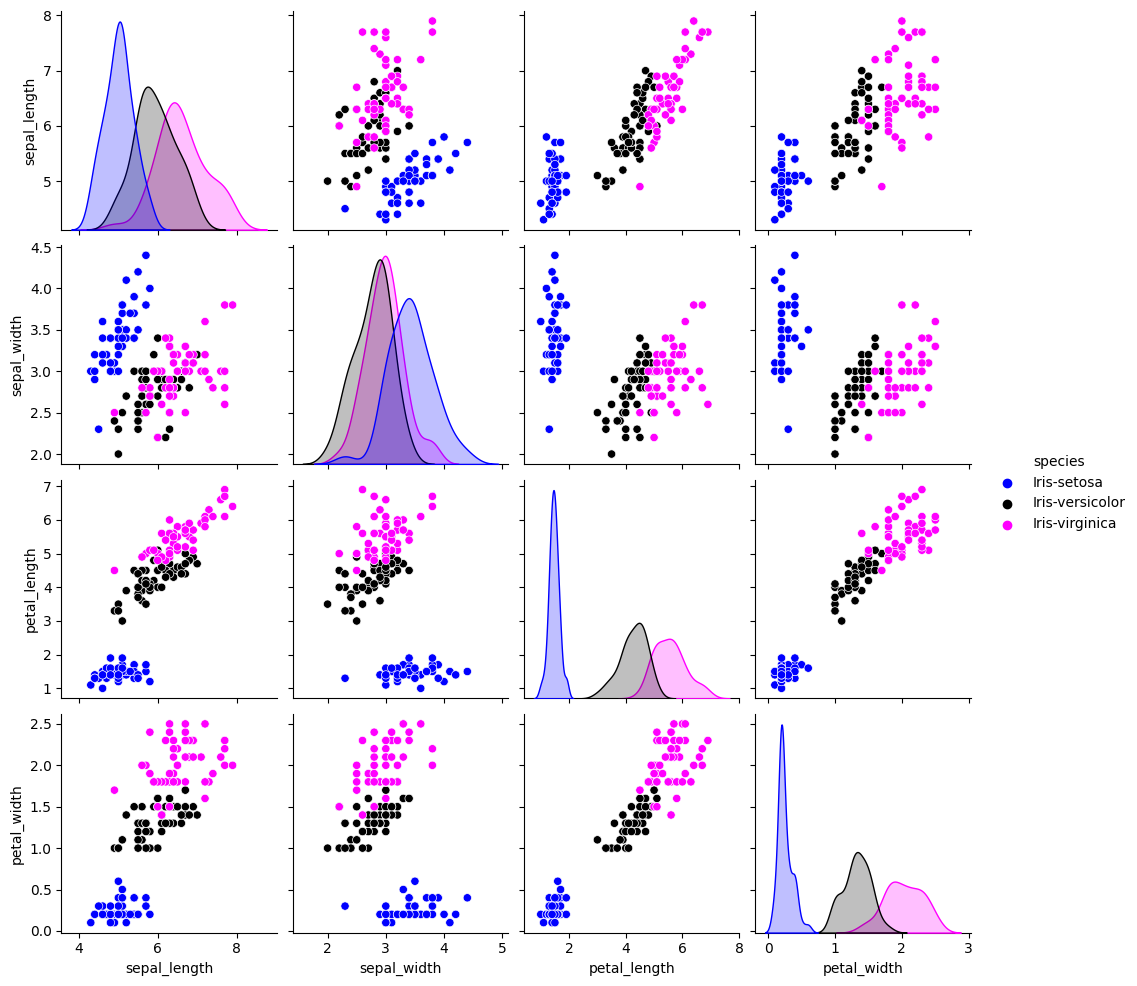

In [137]:
sns.pairplot(df,hue="species",palette={"Iris-setosa": "blue", "Iris-versicolor": "black", "Iris-virginica": "magenta"})
plt.show

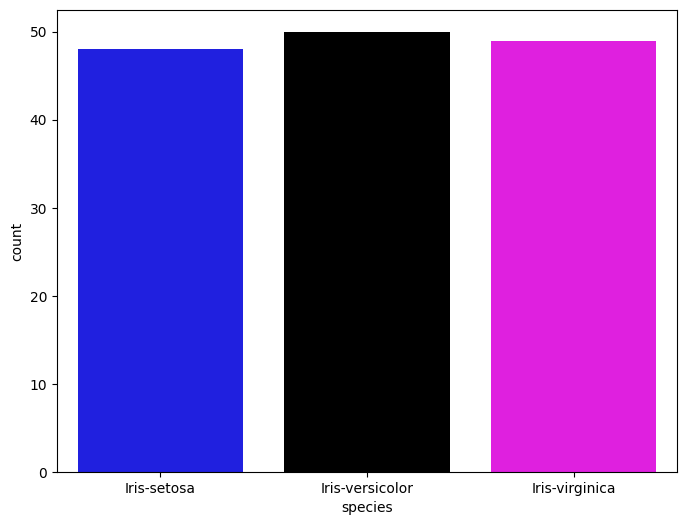

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(x = "species",data = df,palette={"Iris-setosa": "blue", "Iris-versicolor": "black", "Iris-virginica": "magenta"})
plt.show()

We can see that we have Iris versicolor species as highest no in counts.

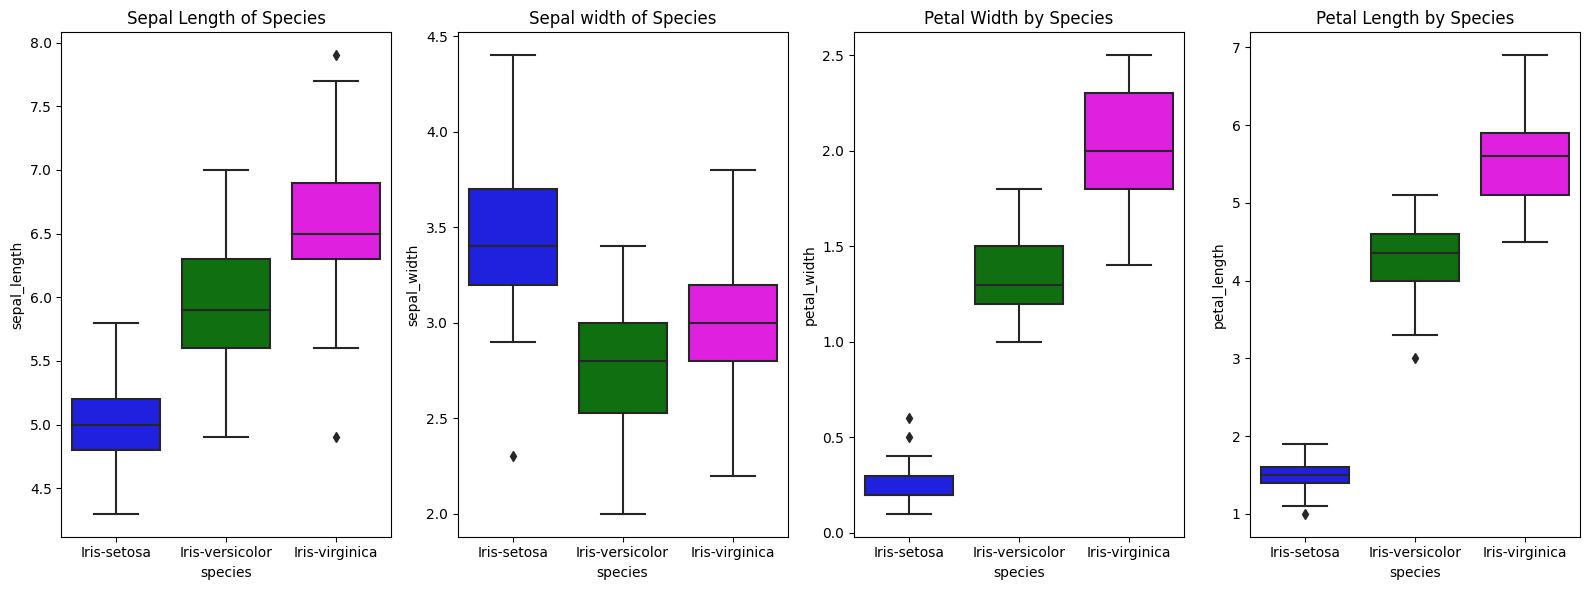

In [139]:
plt.figure(figsize=(16,6))

#Box plot for Sepal Length
plt.subplot(141)
sns.boxplot(x ="species",y="sepal_length",data=df,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.title("Sepal Length of Species")

#boxplot for sepal width
plt.subplot(142)
sns.boxplot(x ="species",y="sepal_width",data=df,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.title("Sepal width of Species")

#box plot for Petal width
plt.subplot(143)
sns.boxplot(x="species", y="petal_width", data=df, palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.title("Petal Width by Species")

#boxplot of petal length
plt.subplot(144)
sns.boxplot(x="species", y="petal_length", data=df, palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.title("Petal Length by Species")

plt.tight_layout()
plt.show()

So as we can see we have some outliers in some or the other species either in sepal lengtn or width or petal length or width.

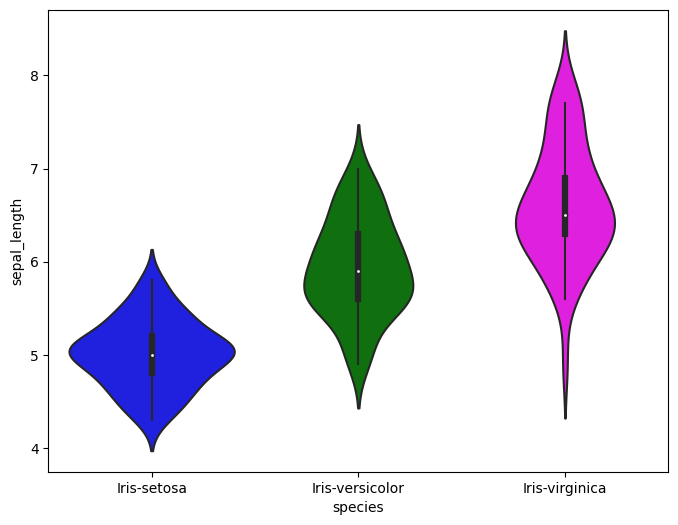

In [140]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species" , y = "sepal_length",data = df ,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

we can see that we have sepal length of iris setosa is 5, versicolor is 6 and virginica is between 6-7 let say 6.5

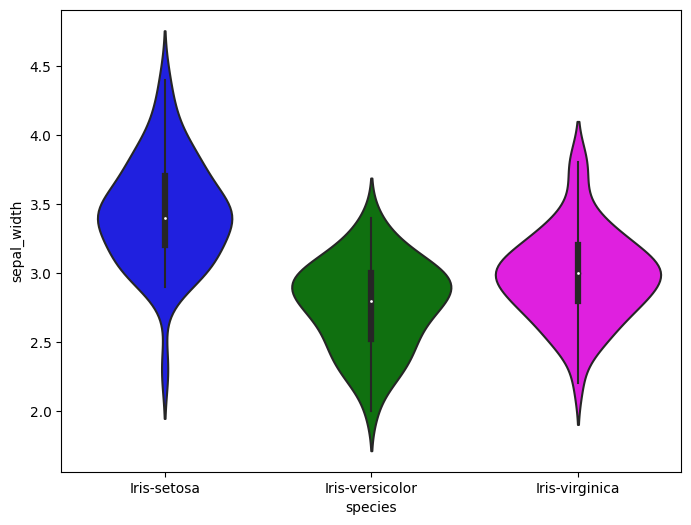

In [141]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species" , y = "sepal_width",data = df ,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

We have sepal width of iris-setosa between 3.0-3.5 and versicolor as 2.5-3.0 and virginica as 3.

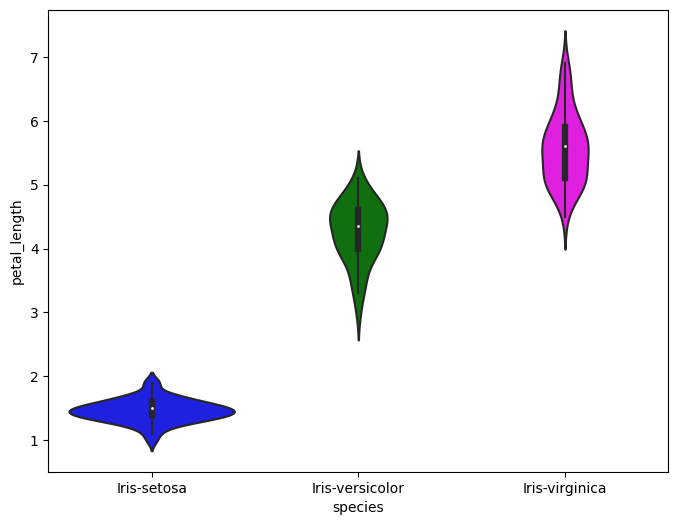

In [142]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species" , y = "petal_length",data = df ,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

We have petal length of setosa between 1-2 and versicolor as 4-5 and virginica as 5-6.

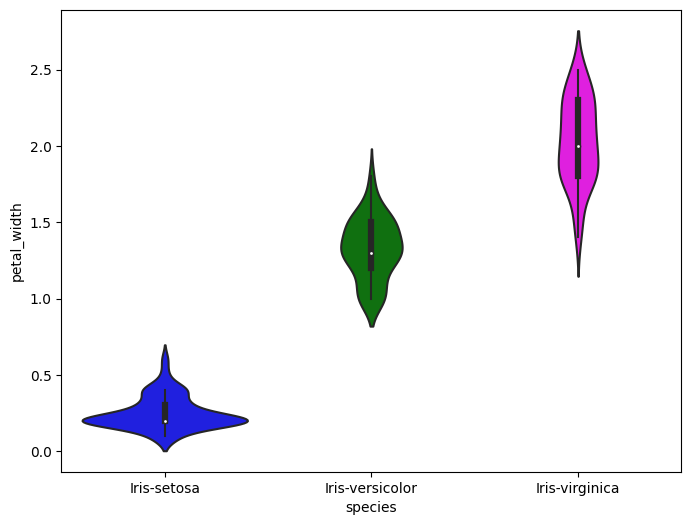

In [143]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species" , y = "petal_width",data = df ,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

We have petal width of setosa as 0.0 -0.5 and versicolor between 1.0 -1.5 and virginica as 2.0

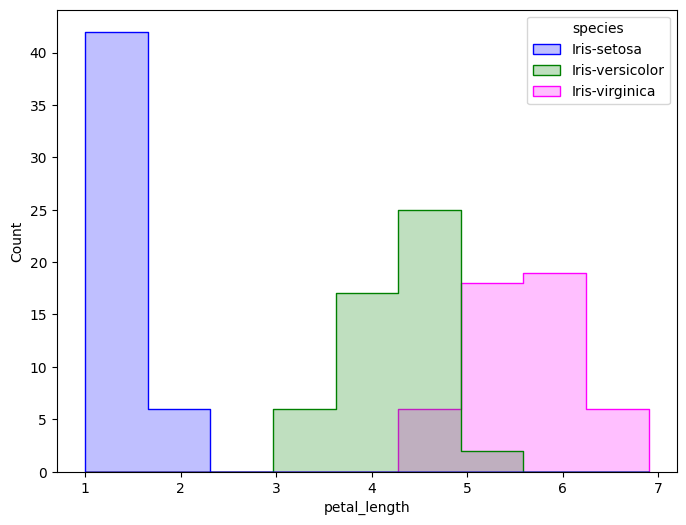

In [144]:
plt.figure(figsize=(8,6))
sns.histplot(data = df,x="petal_length",hue="species",element="step",common_norm=False,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

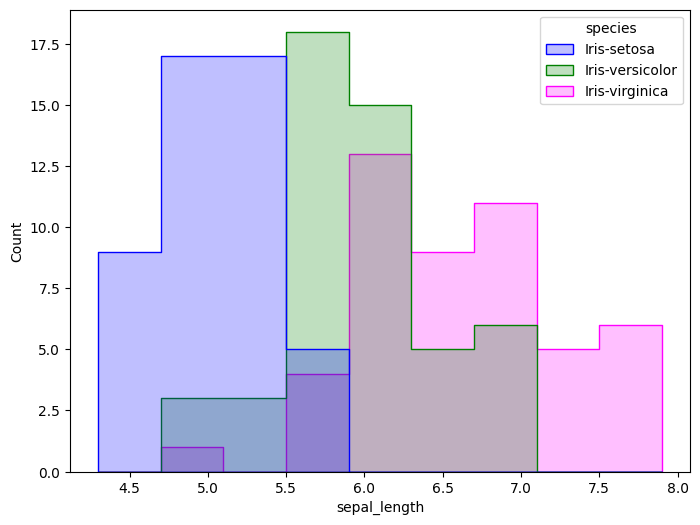

In [145]:
plt.figure(figsize=(8,6))
sns.histplot(data = df,x="sepal_length",hue="species",element="step",common_norm=False,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

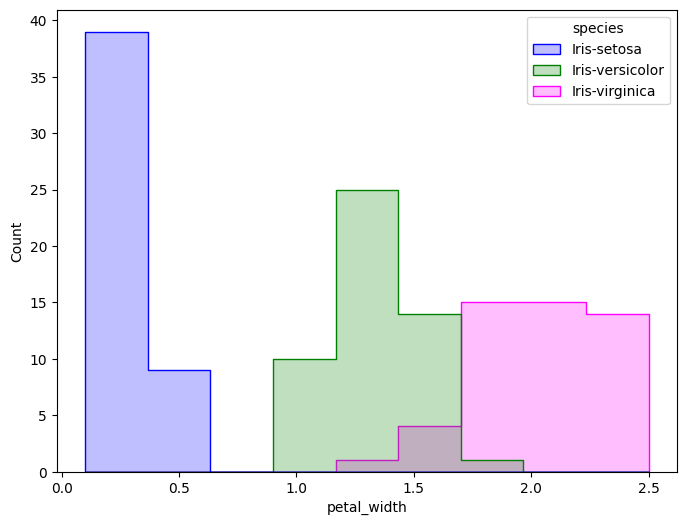

In [146]:
plt.figure(figsize=(8,6))
sns.histplot(data = df,x="petal_width",hue="species",element="step",common_norm=False,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

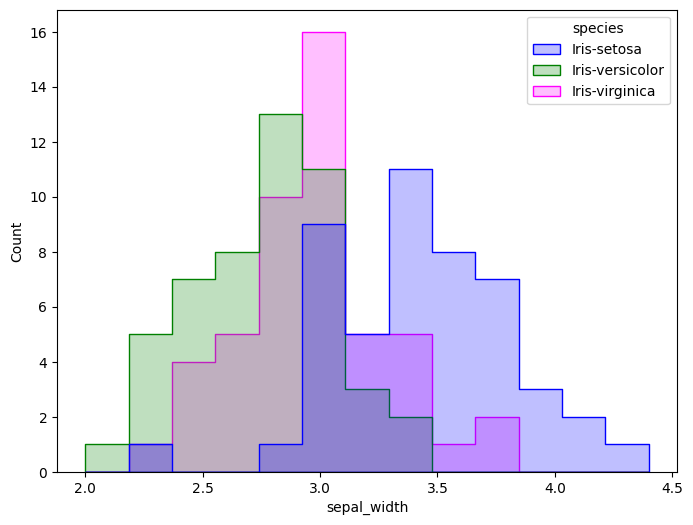

In [147]:
plt.figure(figsize=(8,6))
sns.histplot(data = df,x="sepal_width",hue="species",element="step",common_norm=False,palette={"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "magenta"})
plt.show()

# **Splitting the dataset**

In [148]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [149]:
#spliting data for train and test
x = df.iloc[:,:-1]
y = df.iloc[:,4]

In [150]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [151]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=24)

In [153]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
59,5.2,2.7,3.9,1.4
55,5.7,2.8,4.5,1.3
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
...,...,...,...,...
125,7.2,3.2,6.0,1.8
102,7.1,3.0,5.9,2.1
131,7.9,3.8,6.4,2.0
89,5.5,2.5,4.0,1.3


In [154]:
x_train.shape

(110, 4)

In [155]:
y_train.shape

(110,)

In [156]:
x_test.shape

(37, 4)

In [157]:
y_test.shape

(37,)

In [158]:
#feature scaling in order to avoid Outliers
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [159]:
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# **Model Building**

#Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [161]:
#predicting
logpred = log.predict(x_test)

In [162]:
logpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [163]:
#calculating accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,logpred)
accuracy

0.9459459459459459

So we are getting 94% of accuracy with logistic regression, meaning it has passed most of the sample test.

In [164]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logpred)
cm

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 13]])

we got (0,0) which means true predictions ,i.e 75% of the predictions are correctly predicted.

In [165]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Decision tree model

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = "entropy",random_state=13)
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
dtpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [167]:
y_test

86     Iris-versicolor
106     Iris-virginica
29         Iris-setosa
96     Iris-versicolor
90     Iris-versicolor
126     Iris-virginica
53     Iris-versicolor
11         Iris-setosa
101     Iris-virginica
31         Iris-setosa
112     Iris-virginica
30         Iris-setosa
19         Iris-setosa
14         Iris-setosa
108     Iris-virginica
129     Iris-virginica
105     Iris-virginica
79     Iris-versicolor
113     Iris-virginica
109     Iris-virginica
61     Iris-versicolor
137     Iris-virginica
1          Iris-setosa
136     Iris-virginica
74     Iris-versicolor
50     Iris-versicolor
110     Iris-virginica
80     Iris-versicolor
17         Iris-setosa
78     Iris-versicolor
26         Iris-setosa
51     Iris-versicolor
93     Iris-versicolor
124     Iris-virginica
114     Iris-virginica
9          Iris-setosa
103     Iris-virginica
Name: species, dtype: object

In [168]:
from sklearn.metrics import accuracy_score,confusion_matrix
dtaccuracy=accuracy_score(y_test,dtpred)
dtcm= confusion_matrix(y_test,dtpred)
print(dtaccuracy)
print(dtcm)

0.8648648648648649
[[10  0  0]
 [ 0 12  0]
 [ 0  5 10]]


In decisison tree we got 86% probability, can be considered as a good model but less than logistic regression.

# Random Forest classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=33)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=33)

In [170]:
rfpred=rf.predict(x_test)
rfpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [171]:
#accuracy
rfaccuracy= accuracy_score(y_test,rfpred)
rfaccuracy

0.9459459459459459

Random forest is also giving meaning me 94% accuracy .

# Support Vector Classifier

In [172]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [173]:
model_svmpred=model_svm.predict(x_test)
model_svmpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

# K Nearest Neighbour Classifier

In [174]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [175]:
model_knnpred=model_knn.predict(x_test)
model_knnpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

# Multilayer Perception Classifier
(neural network model)

In [176]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)
model_nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)

In [177]:
model_nnpred=model_nn.predict(x_test)
model_nnpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype='<U15')

In [178]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': logpred, 'Predicted_RF': rfpred,
                           'Predicted_SVM': model_svmpred, 'Predicted_KNN': model_knnpred,
                           'Predicted_DT': dtpred, 'Predicted_NN':model_nnpred})

print(results_df)

              Actual     Predicted_LR     Predicted_RF    Predicted_SVM  \
86   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor   
106   Iris-virginica  Iris-versicolor  Iris-versicolor  Iris-versicolor   
29       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
96   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor   
90   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor   
126   Iris-virginica  Iris-versicolor  Iris-versicolor  Iris-versicolor   
53   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor   
11       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
101   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica   
31       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
112   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica   
30       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
19       Iris-setosa     

# Model Performance Evaulation

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [180]:
# Function to evaluate and print model performance
def evaluate_model(model_name, y_true, y_pred):
    print(f"Model: {model_name}")

    # Confusion Matrix
    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confusion)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=df['species'].unique())
    print("Classification Report:")
    print(report)

    # Accuracy Score
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 40)



In [181]:
evaluate_model("**Logistic Regression**", y_test, logpred)

Model: **Logistic Regression**
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  2 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        37
      macro avg       0.95      0.96      0.95        37
   weighted avg       0.95      0.95      0.95        37

Accuracy: 94.59%
----------------------------------------


In [182]:
evaluate_model("**Random Forest**", y_test, rfpred)

Model: **Random Forest**
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  2 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        37
      macro avg       0.95      0.96      0.95        37
   weighted avg       0.95      0.95      0.95        37

Accuracy: 94.59%
----------------------------------------


In [183]:
evaluate_model("**Support Vector Machine**", y_test, model_svmpred)

Model: **Support Vector Machine**
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  3 12]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.92        37
      macro avg       0.93      0.93      0.93        37
   weighted avg       0.94      0.92      0.92        37

Accuracy: 91.89%
----------------------------------------


In [184]:
evaluate_model("**K-Nearest Neighbors**", y_test, model_knnpred)

Model: **K-Nearest Neighbors**
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  2 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        37
      macro avg       0.95      0.96      0.95        37
   weighted avg       0.95      0.95      0.95        37

Accuracy: 94.59%
----------------------------------------


In [185]:
evaluate_model("**Decision Tree**", y_test, dtpred)

Model: **Decision Tree**
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  5 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.71      1.00      0.83        12
 Iris-virginica       1.00      0.67      0.80        15

       accuracy                           0.86        37
      macro avg       0.90      0.89      0.88        37
   weighted avg       0.90      0.86      0.86        37

Accuracy: 86.49%
----------------------------------------


In [186]:
evaluate_model("**Neural Network**", y_test,model_nnpred )

Model: **Neural Network**
Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  3 12]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.92        37
      macro avg       0.93      0.93      0.93        37
   weighted avg       0.94      0.92      0.92        37

Accuracy: 91.89%
----------------------------------------


# **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

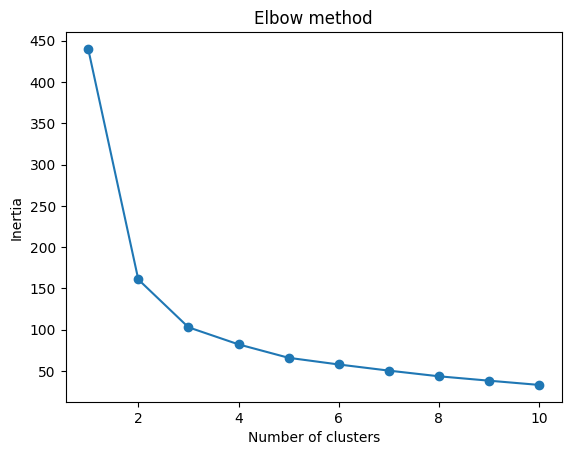

In [187]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_train,y_train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [188]:
new_df = df.iloc[:,:-1]
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [189]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [190]:
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [191]:
pred = km_model.predict(new_df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [192]:
km_model.predict([[1.1,2.2,4.3,4.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [193]:
km_model.predict([[4.3,3,1.1,0.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [194]:
km_model.predict([[5.9	,3.0	,5.1,	1.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [195]:
km_model.predict([[5,3,1.6,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [196]:
km_model.predict([[7.9,3.8,6.4,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

We have 0 for setosa , 1 for versicolor and 2 for virginica

# **Conclusions :**



*   We have three Species Iris-setosa,Iris-versicolor,Iris-virginica.


*   After removing the duplicated columns.We have Iris versicolor species as highest no in counts.

*   We have sepal length of iris setosa is 5, versicolor is 6 and virginica is between 6-7 let say 6.5
*   We have sepal width of iris-setosa between 3.0-3.5 and versicolor as 2.5-3.0 and virginica as 3.


*   We have petal length of setosa between 1-2 and versicolor as 4-5 and virginica as 5-6.

*   We have petal width of setosa as 0.0 -0.5 and versicolor between 1.0 -1.5 and virginica as 2.0

*  We are got 94% of accuracy with logistic regression.

*  In decisison tree we got 86% of accuracy.

*  In Random forest we got 94.59% of accuracy.
*  In support vector machine we got 91.89% of accuracy.


*  In K-Nearest Neighbour we got 94.59% of accuracy.


*  In Neural Netowrk we got the 91.89% of accuracy.


*   Using K-Means Clustering  we classified the species giving different values of petal length and width , sepal length and width .

